# Homework#3 Frequency Domain Analysis and Filtering
#### การบ้านลําดับที่ 3 ในวิชา 01205481 Digital Image Processing มีวัตถุประสงค์ให้นิสิตได้ศึกษาทดลองการทํา Filtering in Frequency Domain เพื่อให้เกิดความเข้าใจกระบวนการพื้นฐาน อาทิการแปลง Fourier Transform การวิเคราะห์องค์ประกอบ ของภาพในเชิงความถี่ และการกรองในโดเมนความถี่ ซึ่งจะเป็นส่วนหนึ่งของเครื่องมือพื้นฐานทางด้าน Image Processing โดยให้นิสิตทําการบ้านตามขั้นตอนที่กําหนดให้ซึ่งมีรายละเอียดดังต่อไปนี้

In [1]:
import rawpy
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

In [2]:
def readImagefromFile(filename):
    img = cv2.imread(str(filename))
    print(f"Shape in put image is {img.shape}")
    img_out = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(f"Shape out put image gray-scale is {img_out.shape}")
    return img_out
def ImageSubplot(img_in,img_name,Title):
    fig, axs = plt.subplots(2, len(img_in), figsize=(30, 12))
    fig.suptitle(Title, fontsize=30)
    for i in range(len(img_in)):
        axs[0,i].imshow(img_in[i], cmap="gray", vmin=0, vmax=255)
        axs[0,i].set_xlabel(img_name[i], fontsize=15)
        axs[1,i].hist(img_in[i].flatten(),bins=256)
        axs[1,i].set_xlabel('Hist image '+ str(img_name[i]), fontsize=15)
    plt.show()
    
def ImageSubplot_freq(img_in,img_name,Title):
    fig, axs = plt.subplots(2, len(img_in), figsize=(30, 12))
    fig.suptitle(Title, fontsize=30)
    for i in range(len(img_in)):
        axs[0,i].imshow(img_in[i])
        axs[0,i].set_xlabel(img_name[i], fontsize=15)
        axs[1,i].hist(img_in[i].flatten(),bins=256)
        axs[1,i].set_xlabel('Hist image '+ str(img_name[i]), fontsize=15)
    plt.show()

## รายละเอียดการบ้านครั้งที่ 3 Frequency Domain Analysis & Filtering
## 1. การทดลองที่ 1 Lowpass/Highpass Filter Decomposition ใน Frequency Domain
#### เป็นการทดลองเพื่อศึกษาการแยกตัวประกอบเชิงความถี่ โดยแตกออกเป็นภาพความถี่ต่ํา และ ภาพความถี่สูง และ ทําการประกอบกลับ โดยทําการทดลองตามขึ้นตอนต่อไปนี้

### 1.1 ให้นิสิตนํารูปภาพมา 1 ภาพ กรณีที่เป็นภาพสี ให้ทําการแปลงเป็นรูปขาวดํา (Gray-Scale)

In [3]:
Gray_Img = readImagefromFile("_MG_5488.jpg")

Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)


In [4]:
img = []
img.append(Gray_Img)

In [5]:
name_img = ["Original","Phase","magnitude"]

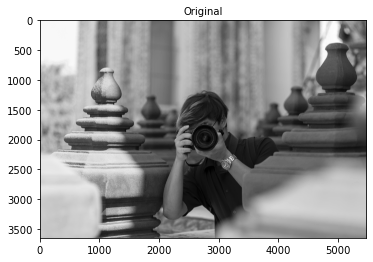

In [6]:
plt.imshow(Gray_Img, cmap="gray", vmin=0, vmax=255)
plt.title("Original", fontsize=10)
plt.show()

### 1.2 ทําการแปลงรูปภาพให้อยู่ในโดเมนความถี่โดยการใช้ 2D Fourier Transform (ใช้ Log Scale หรือแบนความถี่จุดศูนย์กลางเพื่อดู Spectrum Magnitude)

In [7]:
def Fast_Fourier_Transform(Input_img):
    ### -> Forward FFT
    fft_complex = np.fft.fft2(Input_img)
    print(f"Shape in put image is {Input_img.shape}")
    print(fft_complex.dtype)
    print(fft_complex.shape, Input_img.shape)
    # - Magnitude
    fft_magnitude = np.abs(fft_complex)
    # - Phase
    fft_phase = np.arctan2(fft_complex.imag,fft_complex.real)
    # - Shift Magnitude
    fft_magnitude = np.fft.fftshift(fft_magnitude)
    print(f"Shape out put is {fft_magnitude.shape}")
    return fft_complex,fft_phase,fft_magnitude

def Invert_Fast_Fourier_Transform(ifft_magnitude,fft_phase):
    # - Invert Shift Magnitude
    ifft_magnitude = np.fft.ifftshift(ifft_magnitude)
    # - Combine Magnitude Phase
    ifft_real = ifft_magnitude * np.cos(fft_phase)
    ifft_imag = ifft_magnitude * np.sin(fft_phase)
    # - Combine into Complex
    ifft_complex = ifft_real + (ifft_imag * 1j)
    ### -> Invert FFT
    output_complex = np.fft.ifft2(ifft_complex)
    print(output_complex.dtype)
    print(output_complex.shape)
    ### -> Get Image Data from Real part
    output_img_r = output_complex.real
    output_img_i = output_complex.imag
    return output_img_r,output_img_i

In [8]:
Gray_Img_freq_co,Gray_Img_freq_phase,Gray_Img_freq_magnitude = Fast_Fourier_Transform(Gray_Img)

Shape in put image is (3648, 5472)
complex128
(3648, 5472) (3648, 5472)
Shape out put is (3648, 5472)


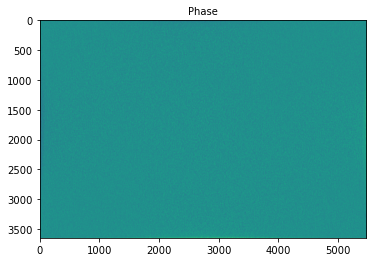

In [9]:
plt.imshow(Gray_Img_freq_phase)
plt.title("Phase", fontsize=10)
plt.show()

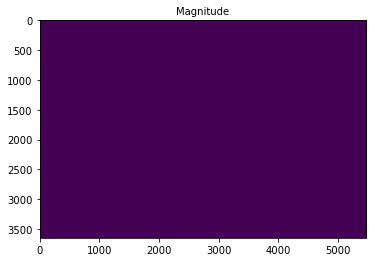

In [10]:
plt.imshow(Gray_Img_freq_magnitude)
plt.title("Magnitude", fontsize=10)
plt.show()

In [11]:
def Fourier_Transform_Log_Scale(Input_img):
    
    _,freq_phase,freq_magnitude = Fast_Fourier_Transform(Input_img)
    
    ### -> Banning Circle
    center_ban = np.ones_like(freq_magnitude)
    center_ban = np.ascontiguousarray(center_ban)

    # - Radius, Center Position
    radius = 5
    center = (int(center_ban.shape[1]//2),
    int(center_ban.shape[0]//2))
    
    # - Draw Circle
    center_ban = cv2.circle(center_ban, center,radius, 0, -1)
    
    ### -> Banning at Magnitude center
    cb_magnitude = freq_magnitude * center_ban
    
    
    ### -> Normalization with max value
    norm_magnitude = cb_magnitude / cb_magnitude.max()
    ### -> Logarithm Scaling
    log_magnitude = np.log(1 + norm_magnitude)
    
    return log_magnitude

In [12]:
log_magnitude1 = Fourier_Transform_Log_Scale(Gray_Img)

Shape in put image is (3648, 5472)
complex128
(3648, 5472) (3648, 5472)
Shape out put is (3648, 5472)


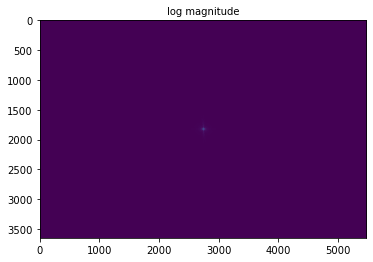

In [13]:
plt.imshow(log_magnitude1)
plt.title("log magnitude", fontsize=10)
plt.show()

### 1.3 สร้างตัวกรองแบบ Ideal Lowpass Filter และ Ideal Highpass Filter โดยกําหนด Cut-off Frequency D0 ที่เดียวกัน โดยให้นิสิตเป็นผู้กําหนดค่านี้เอง (ตัวกรองจะเป็นส่วนกลับของกันและกันเนื่องจากใช้ค่า Cut-off ค่าเดียวกัน)

In [14]:
def distanceMap(fft_magnitude, f_pos):
    
    IMG_HEIGH = fft_magnitude.shape[0]
    IMG_WIDTH = fft_magnitude.shape[1]
    
    ### -> Preset Position Index
    v = np.arange(0.5*((IMG_HEIGH+1)%2),0.5*((IMG_HEIGH+1)%2)+IMG_HEIGH)
    u = np.arange(0.5*((IMG_WIDTH+1)%2),0.5*((IMG_WIDTH+1)%2)+IMG_WIDTH)
    # print(f"{v},{u}")
    uv, vv = np.meshgrid(u, v)
    
    ### -> Distance Map (Euclidean)
    distance_map = ((uv-f_pos[0])**2 +(vv-f_pos[1])**2)**0.5
    
    return distance_map


def idealFunction(distance_map, freq_cutoff):
    ### -> Create Ideal array
    ideal_func = distance_map.copy()
    
    ### -> Ideal Function
    ideal_func[distance_map <= freq_cutoff] = 1
    ideal_func[distance_map > freq_cutoff] = 0
    
    return ideal_func


def lowPassFilter(fft_magnitude, f_pos, freq_cutoff):
    ### -> Distance Map
    distance_map = distanceMap(fft_magnitude, f_pos)
    
    ### -> Ideal Low-pass Filter
    lp_filter = idealFunction(distance_map, freq_cutoff)
    
    return lp_filter

In [15]:
cutoff_freq = 100
### -> Create Frequency Filter
center_pos = (Gray_Img_freq_magnitude.shape[1]//2,Gray_Img_freq_magnitude.shape[0]//2)

### -> Low-pass Filter
lp_filter = lowPassFilter(Gray_Img_freq_magnitude,center_pos, cutoff_freq)

### -> High-pass Filter (from Low-pass Filter)
hp_filter = 1 - lp_filter

In [16]:
print(lp_filter)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(hp_filter)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


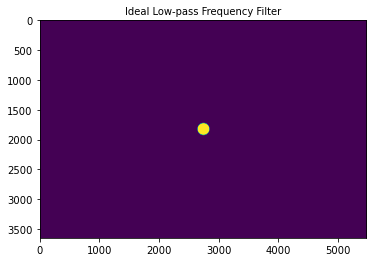

In [18]:
plt.imshow(lp_filter)
plt.title("Ideal Low-pass Frequency Filter", fontsize=10)
plt.show()

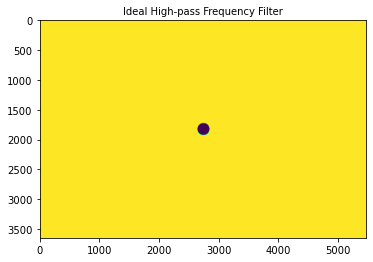

In [19]:
plt.imshow(hp_filter)
plt.title("Ideal High-pass Frequency Filter", fontsize=10)
plt.show()

### 1.4. นําภาพที่ผ่านการแปลง Fourier ในข้อ 1.2 มาผ่านตัวกรองที่สร้างขึ้น และทํา Inverse Fourier Transform จากนั้นแสดงภาพก่อนและหลังการผ่านตัวกรองใน Spatial domain (Output1, Output2) และ Frequency domainรวมทั้ง ภาพของตัวกรองที่ใช้พร้อม Parameter

In [20]:
### -> Filtering
Low_pass_ifft_magnitude = Gray_Img_freq_magnitude * lp_filter
High_pass_ifft_magnitude = Gray_Img_freq_magnitude * hp_filter
GRAY_IFFT_LOW,_ = Invert_Fast_Fourier_Transform(Low_pass_ifft_magnitude,Gray_Img_freq_phase)
GRAY_IFFT_HIGH,_ = Invert_Fast_Fourier_Transform(High_pass_ifft_magnitude,Gray_Img_freq_phase)

Filter_create = []
img_freq_Domain = []
img_high = []
img_low = []

Filter_create.append(lp_filter)
Filter_create.append(hp_filter)

img_high.append(Gray_Img)
img_high.append(GRAY_IFFT_HIGH)

img_low.append(Gray_Img)
img_low.append(GRAY_IFFT_LOW)

img_freq_Domain.append(Low_pass_ifft_magnitude)
img_freq_Domain.append(High_pass_ifft_magnitude)

complex128
(3648, 5472)
complex128
(3648, 5472)


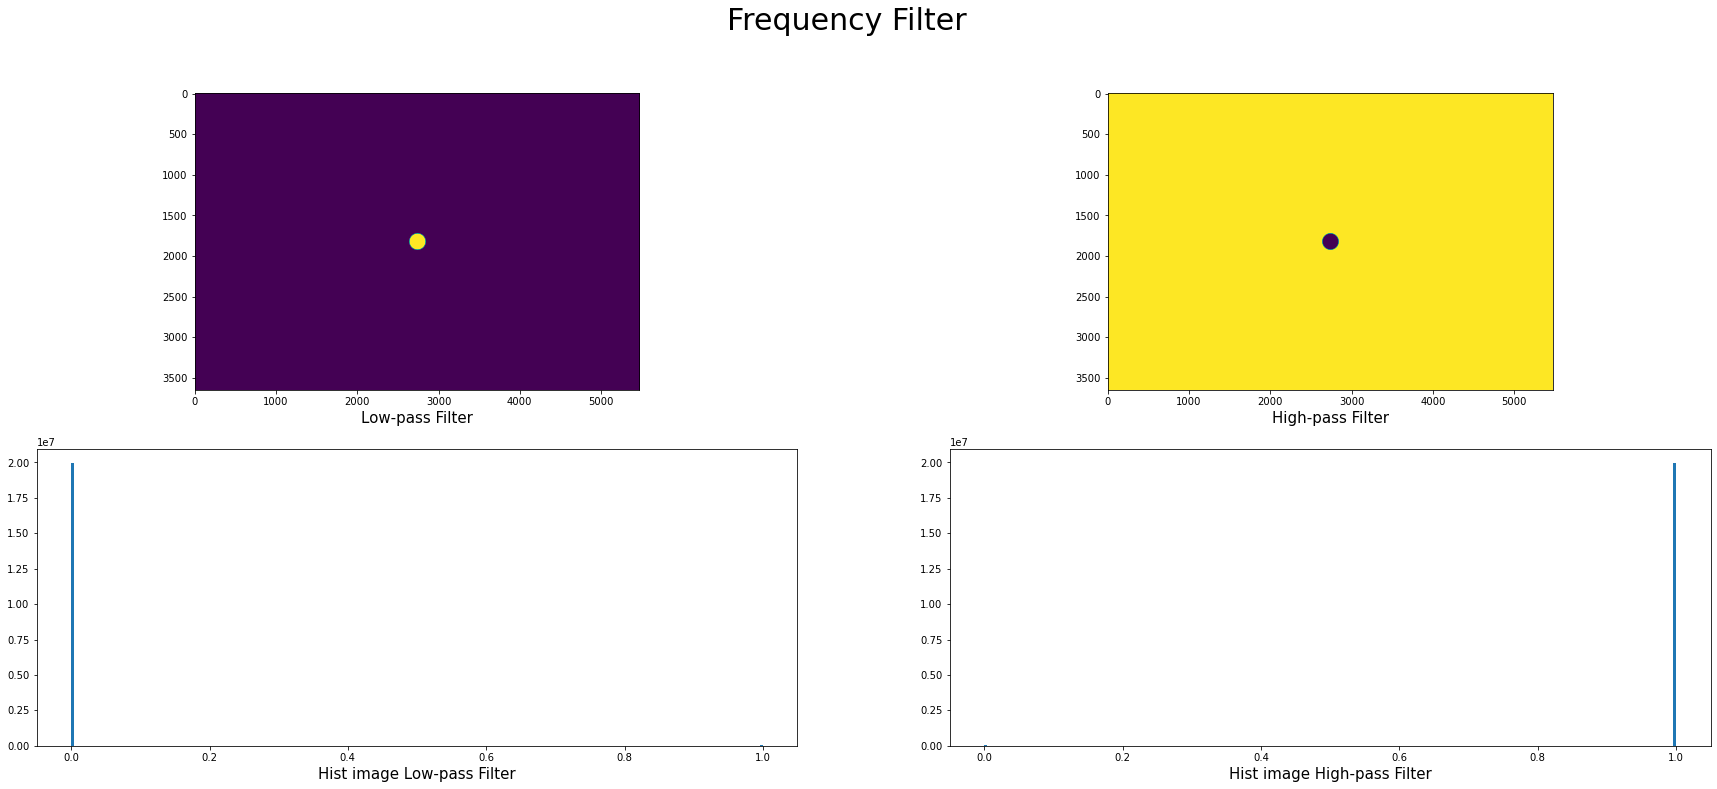

In [21]:
ImageSubplot_freq(Filter_create,img_name = ["Low-pass Filter","High-pass Filter"],Title = "Frequency Filter")

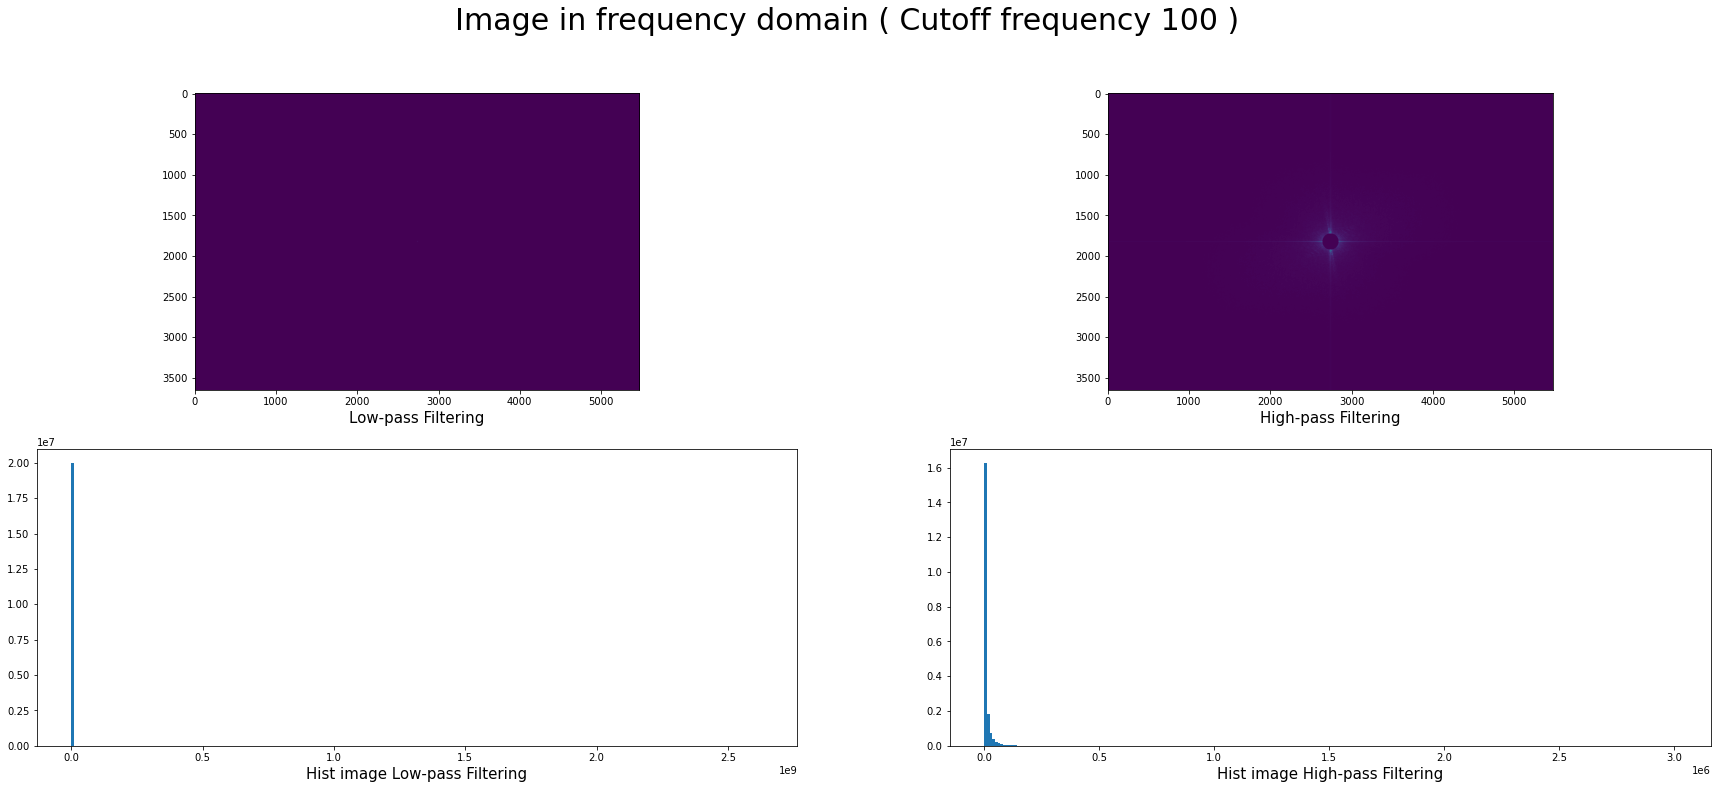

In [22]:
ImageSubplot_freq(img_freq_Domain,img_name = ["Low-pass Filtering","High-pass Filtering"],Title = f"Image in frequency domain ( Cutoff frequency {cutoff_freq} )")

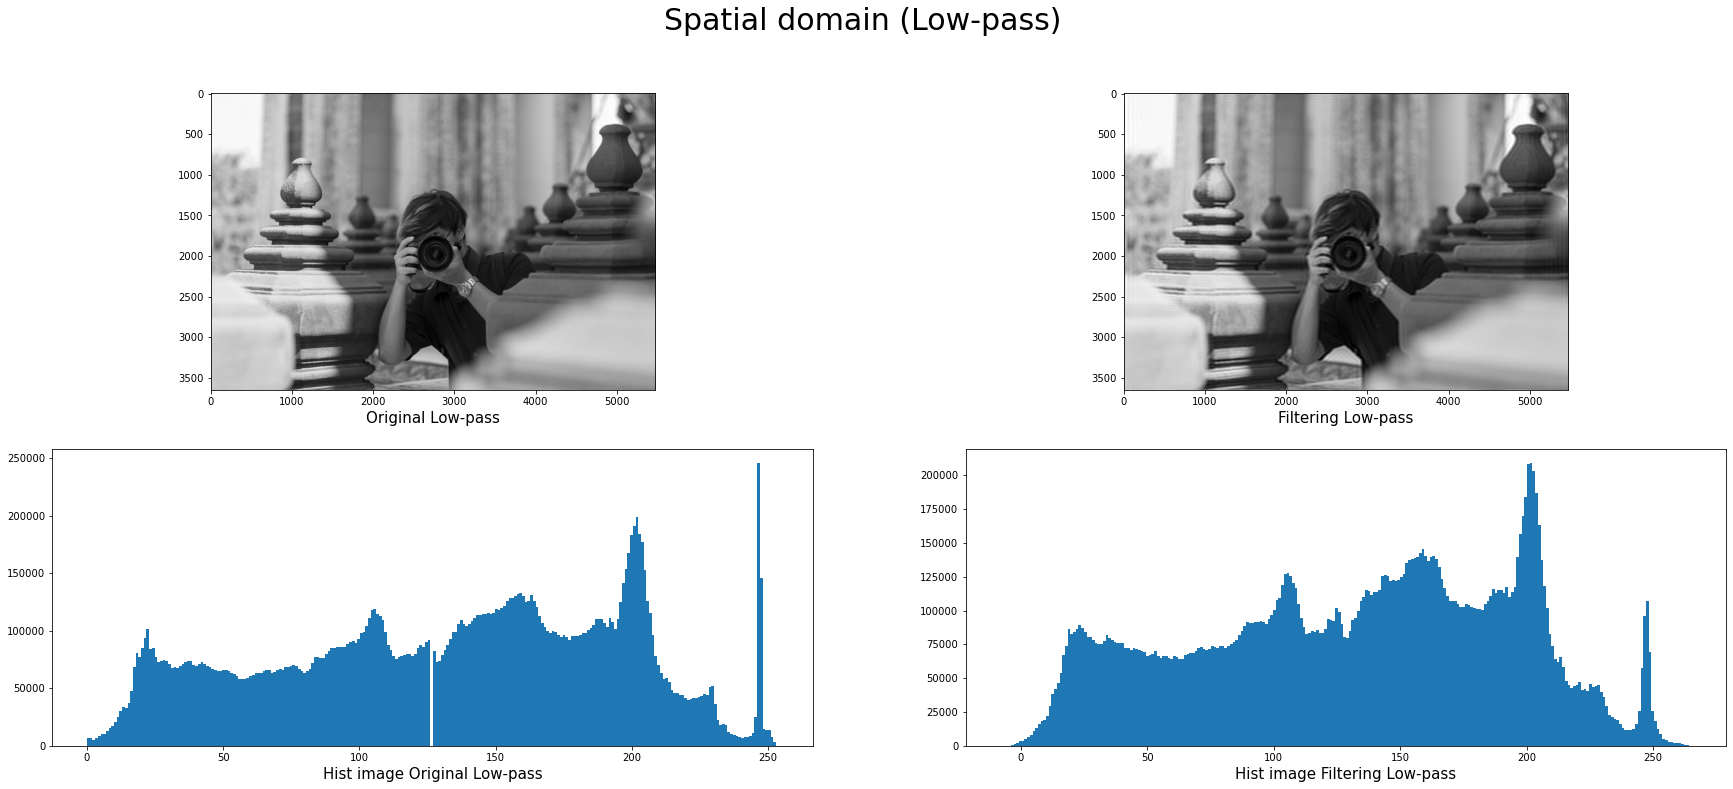

In [23]:
ImageSubplot(img_low,img_name = ["Original Low-pass","Filtering Low-pass"],Title = "Spatial domain (Low-pass)")

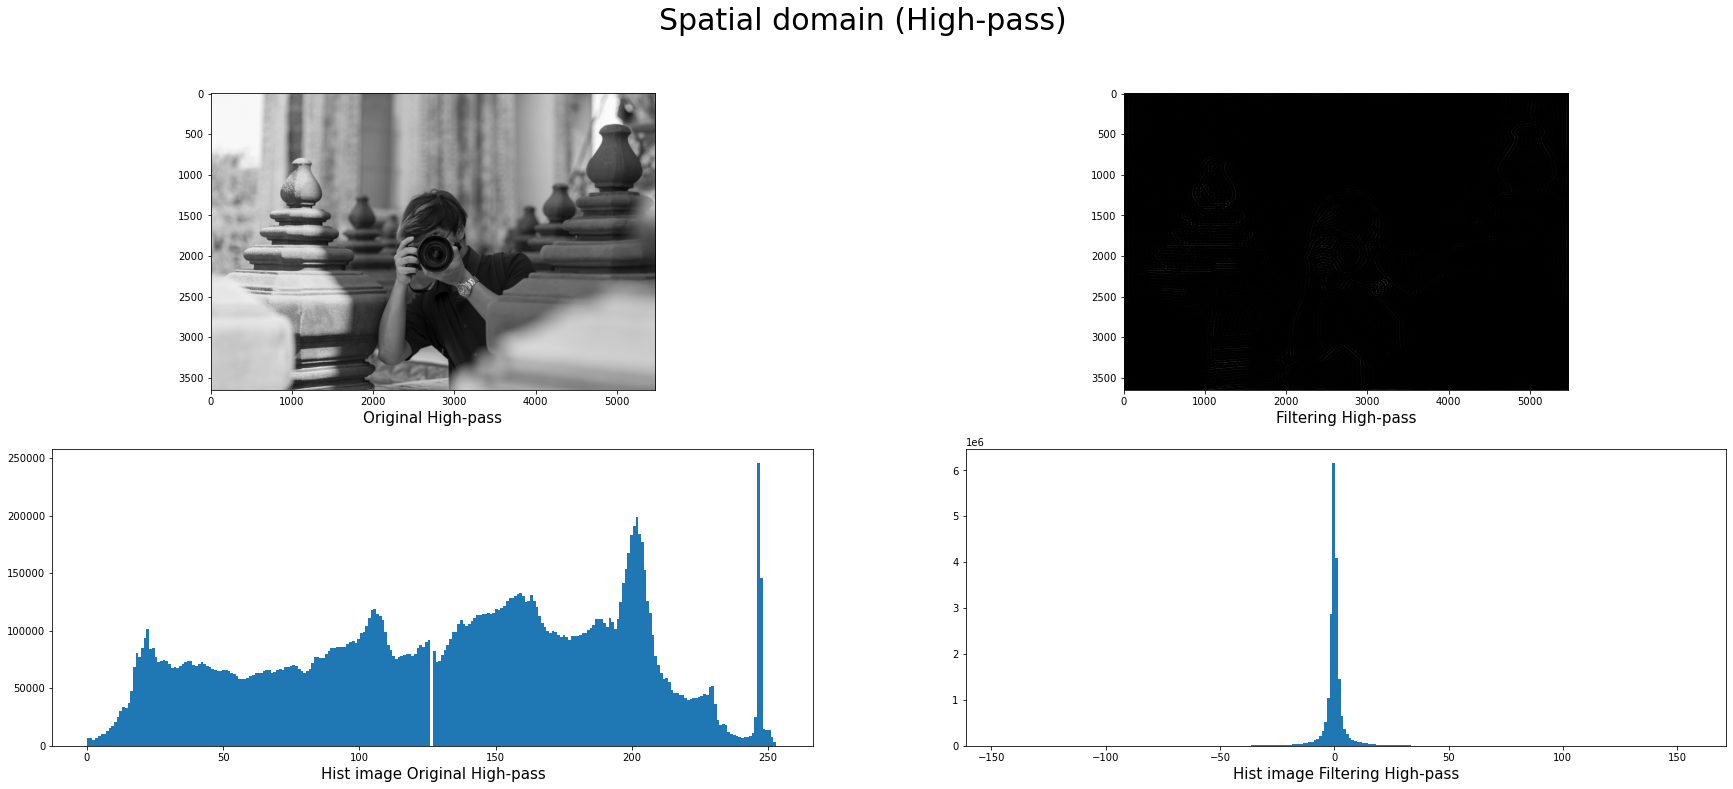

In [24]:
ImageSubplot(img_high,img_name = ["Original High-pass","Filtering High-pass"],Title = "Spatial domain (High-pass)")

### 1.5. นําภาพที่ผ่านการทํา Inverse Fourier Transform (Output1, Output2) ทั้งสองมาบวกกันแบบจุดต่อจุดและแสดง Output3 จงเปรียบเทียบภาพต้นฉบับกับภาพที่ได้จากการประกอบกลับ มีความแตกต่างกันอย่างไร ทําไมถึงเป็น เช่นนั้น อธิบาย รวมทั้งส่ง Source Code โปรแกรม Python ของการทําการทดลองที่1 นี้

In [25]:
combine = GRAY_IFFT_LOW + GRAY_IFFT_HIGH

In [26]:
IMG_combine = [GRAY_IFFT_LOW,GRAY_IFFT_HIGH,combine,Gray_Img]

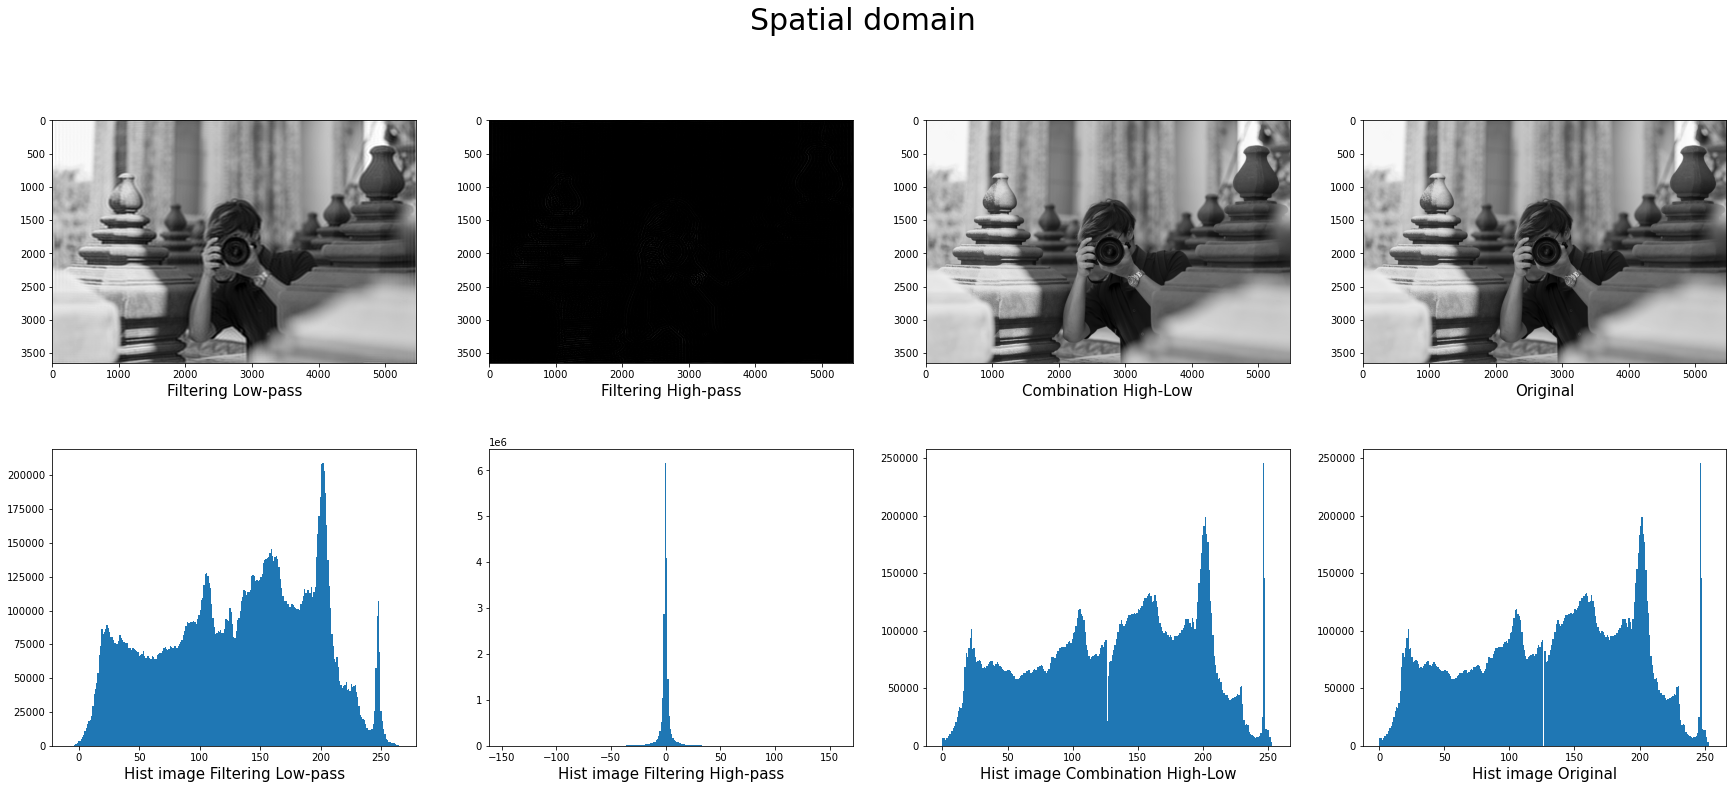

In [27]:
ImageSubplot(IMG_combine,img_name = ["Filtering Low-pass","Filtering High-pass","Combination High-Low","Original"],Title = "Spatial domain")

### Ans.

#### ในการทำ Low-pass filter เป็นการตัดส่วนที่ความถี่สูงออกซึ่งจะเหลือแต่ความถี่ตํ่า และในส่วน High-pass filter เป็นการตัดส่วนที่ความถี่ตํ่าออกซึ่งจะเหลือแต่ความถี่สูง และเมื่อนำรูปที่ผ่าน  Low-pass filter กับ High-pass filter มารวมกัน ส่วนความถี่สูงกับความถี่ตํ่าก็จะมารวมกันเหมือนภาพต้นฉบับ

## 2. การทดลองที่ 2 Image Enhancement ใน Frequency Domain

### 2.1. ให้นิสิตนํารูปภาพมา 1 ภาพ กรณีที่เป็นภาพสี ให้ทําการแปลงเป็นรูปขาวดํา (Gray-Scale)

Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)


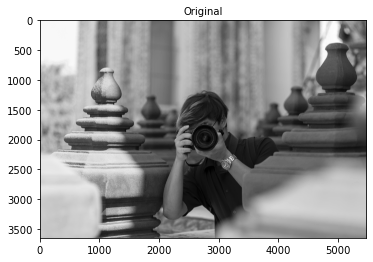

In [28]:
Gray_Img = readImagefromFile("_MG_5488.jpg")
plt.imshow(Gray_Img, cmap="gray", vmin=0, vmax=255)
plt.title("Original", fontsize=10)
plt.show()

### 2.2. ทําการแปลงรูปภาพให้อยู่ในโดเมนความถี่โดยการใช้ 2D Fourier Transform

In [29]:
Gray_Img_freq_co2,Gray_Img_freq_phase2,Gray_Img_freq_magnitude2 = Fast_Fourier_Transform(Gray_Img)

Shape in put image is (3648, 5472)
complex128
(3648, 5472) (3648, 5472)
Shape out put is (3648, 5472)


### 2.3. สร้างตัวกรอง และทําการ Enhancement ภาพดังต่อไปนี้

### 2.3.1. Laplacian: ใช้ตัวกรอง Laplacian และทําการ Enhance ภาพตามสมการที่ 15 ใน Lecture14 หรือตามที่ แนะนําใน Program-11

In [30]:
def lpcSharpening(fft_magnitude, f_pos, k):
    ### -> Distance Map
    distance_map = distanceMap(fft_magnitude, f_pos)
    
    # => Laplacian Filter
    lpc_filter = 4*(np.pi)**2 * distance_map**2                                    # c∇2= [4 * π**2 * D(u,v)**2]
    lpc_filter = (lpc_filter-lpc_filter.min())/(lpc_filter.max()-lpc_filter.min()) # Normolize [0,1]
    
    ### => Sharpening
    ifft_magnitude = fft_magnitude + k*(lpc_filter*fft_magnitude) # G(u,v) = F(u,v) + k*Laplacian*FFT-magnitude
    return ifft_magnitude

In [31]:
center_pos = (Gray_Img_freq_magnitude.shape[1]//2,Gray_Img_freq_magnitude.shape[0]//2)

Gray_Img_freq_magnitude2_lpcSharpening = lpcSharpening(Gray_Img_freq_magnitude2,center_pos,k = 1000)

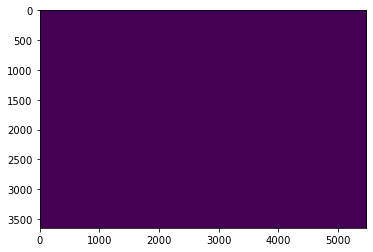

In [32]:
plt.imshow(Gray_Img_freq_magnitude2_lpcSharpening)

complex128
(3648, 5472)


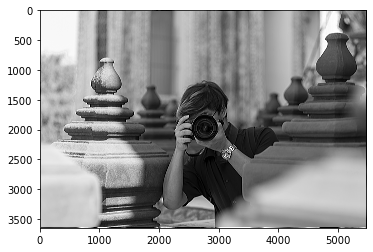

In [33]:
GRAY_IFFT_lpcSharpening,_ = Invert_Fast_Fourier_Transform(Gray_Img_freq_magnitude2_lpcSharpening,Gray_Img_freq_phase)
plt.imshow(GRAY_IFFT_lpcSharpening, cmap="gray", vmin=0, vmax=255)

### 2.3.2. Unsharp Masking with Ideal Lowpass Filter: สร้างตัวกรอง Ideal Lowpass Filter โดย Cut-off Frequency D0 และทําการ Enhance แบบ Unsharp Masking ตามสมการที่ 20 ใน Lecture 14 หรือตามที่ แนะนําใน Program-11 โดยให้นิสิตปรับค่า D0 และค่า k เพื่อให้ภาพ Enhance หรือดูดีกว่าภาพต้นฉบับ

In [34]:
def Unsharp_Masking_Frequency_Domain(fft_magnitude, f_pos, cutoff_freq, k):
    ### -> Low-pass Filter
    lp_filter = lowPassFilter(fft_magnitude, f_pos, cutoff_freq)

    ### -> High-pass Filter (from Low-pass Filter)
    # hp_filter = 1 - lp_filter
    
    ### G(u, v) = [1 + k[1 − low-pass(u,v)]]F(u, v)
    High_boost = (1 - k*(1 - lp_filter))*fft_magnitude
    
    return High_boost

In [35]:
Gray_Img_freq_magnitude2_Unsharp_Masking = Unsharp_Masking_Frequency_Domain(Gray_Img_freq_magnitude2, center_pos, cutoff_freq = 200, k = 5)

complex128
(3648, 5472)


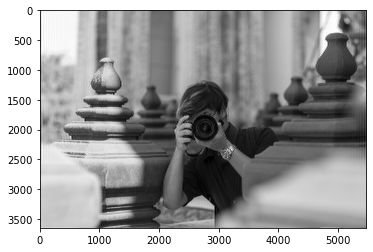

In [36]:
GRAY_IFFT_Unsharp_Masking,_ = Invert_Fast_Fourier_Transform(Gray_Img_freq_magnitude2_Unsharp_Masking,Gray_Img_freq_phase)
plt.imshow(GRAY_IFFT_Unsharp_Masking, cmap="gray", vmin=0, vmax=255)

### 2.4. จงเปรียบเทียบภาพที่ผ่านการปรับปรุงด้วยวิธีที่ (2.3.1) และ (2.3.2) ว่ามีความแตกต่างกันอย่างไร ทําไมถึงเป็นเช่นนั้น อธิบาย รวมทั้งส่ง Source Code โปรแกรม Python ของการทําการทดลองที่1 นี้

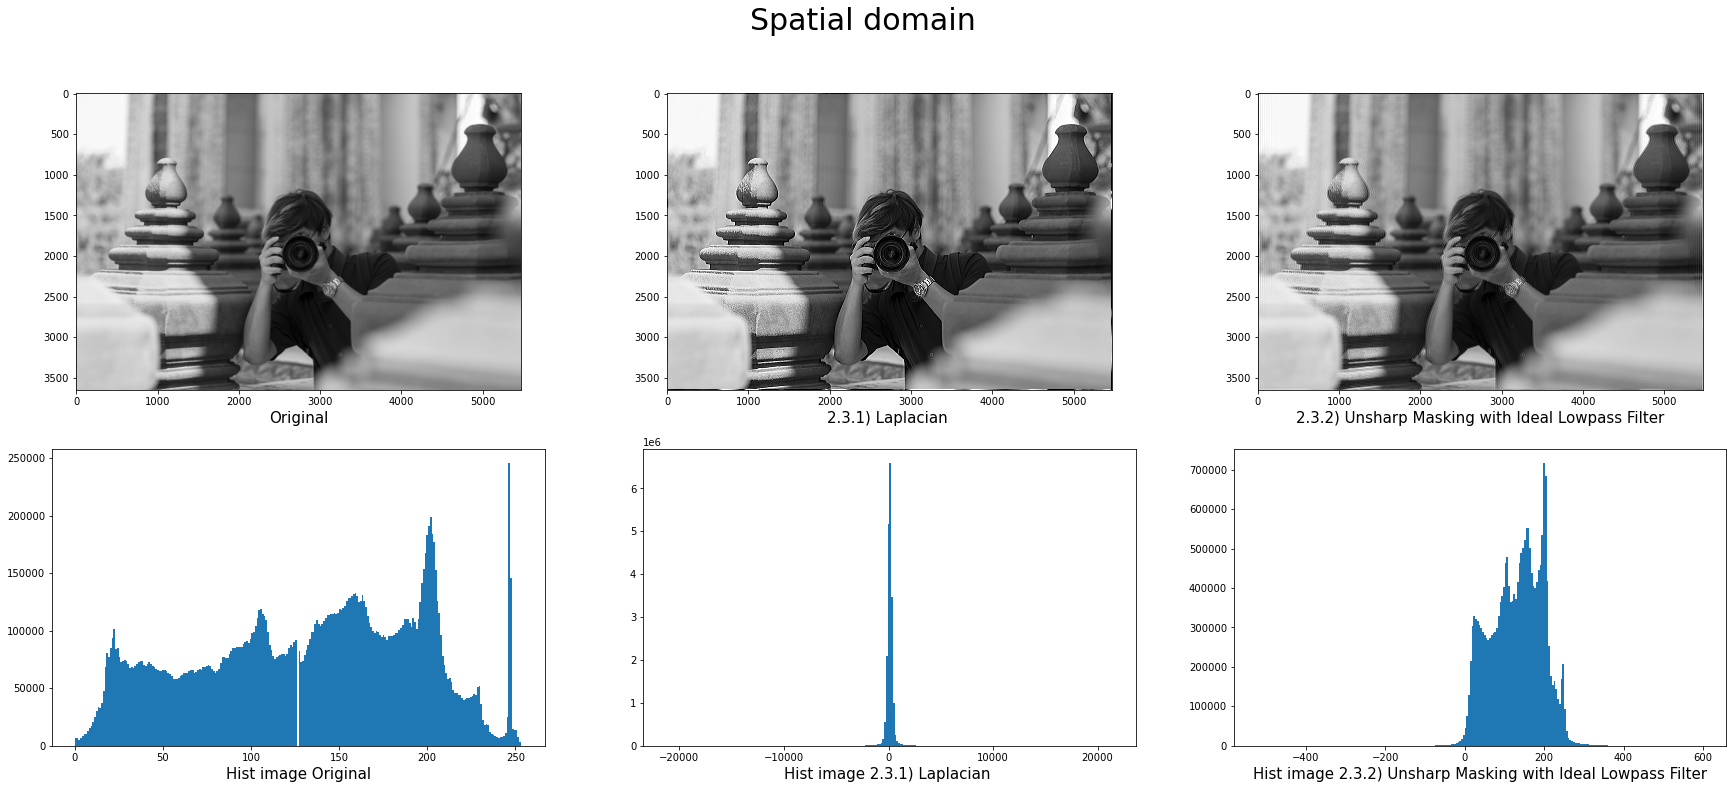

In [37]:
img_ans2 = [Gray_Img,GRAY_IFFT_lpcSharpening,GRAY_IFFT_Unsharp_Masking]
ImageSubplot(img_ans2,img_name = ["Original","2.3.1) Laplacian ","2.3.2) Unsharp Masking with Ideal Lowpass Filter"],Title = "Spatial domain")

### Ans

#### ทั้ง 2 ภาพมีความแตกต่างกันที่ ภาพที่ผ่าน Laplacian ลายละเอียดของภาพบางส่วนจะหายไปเมื่อดูจากกราฟ Histogram  ในส่วนภาพที่ผ่าน Unsharp Masking จะยังเก็บลายละเอียดได้มากกว่า

## 3. การทดลองที่ 3 การทํา Image Noise Reduction
#### เป็นการทดลองเพื่อศึกษาการลดสัญญาณรบกวนของภาพแบบซ้ําคาบ (Periodic Noise) โดยทดลองทํา Noise Reduction ใน Frequency Domain โดยใช้ตัวกรอง Notch Filter กรองตําแหน่ง Impulse ของ Periodic Noise ใน Frequency Domain โดยทําการทดลองตามขั้นตอนดังต่อไปนี้

### 3.1. ให้นิสิตนํารูปภาพมา 1 ภาพ โดยเป็นภาพที่มีสัญญาณรบกวนแบบรายคาบ (Periodic Noise) ซึ่งสามารถได้จากการ Scan ภาพจากหนังสือพิมพ์หรือสิ่งพิมพ์ต่างๆ กรณีที่เป็นภาพสี ให้ทําการแปลงเป็นรูปขาวดํา (Gray-Scale) หรือใส่สัญญาณรบกวนแบบรายคาบเพิ่มเติมเองตามที่แนะนําท้าย Program-12

Shape in put image is (666, 1000, 3)
Shape out put image gray-scale is (666, 1000)


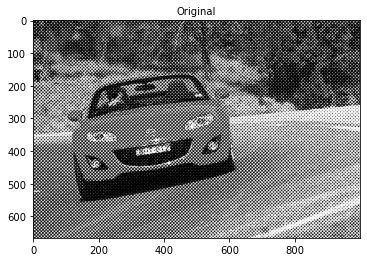

In [38]:
Periodic_Noise = readImagefromFile("Periodic_noise.png")
plt.imshow(Periodic_Noise, cmap="gray", vmin=0, vmax=255)
plt.title("Original", fontsize=10)
plt.show()

### 3.2. ทําการแปลงรูปภาพให้อยู่ในโดเมนความถี่โดยการใช้ 2D Fourier Transform (ควรใช้ Log Scale หรือแบนความถี่จุดศูนย์กลางเพื่อดู Spectrum Magnitude)

Shape in put image is (666, 1000)
complex128
(666, 1000) (666, 1000)
Shape out put is (666, 1000)


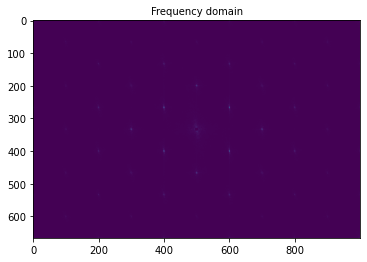

In [39]:
log_magnitude_Periodic_Noise = Fourier_Transform_Log_Scale(Periodic_Noise)
plt.imshow(log_magnitude_Periodic_Noise)
plt.title("Frequency domain", fontsize=10)
plt.show()

In [40]:
_,Periodic_Noise_freq_phase,Periodic_Noise_freq_magnitude = Fast_Fourier_Transform(Periodic_Noise)

Shape in put image is (666, 1000)
complex128
(666, 1000) (666, 1000)
Shape out put is (666, 1000)


### 3.3. พิจารณาตําแหน่ง Peak Periodic Noise Spectrum โดยให้ออกแบบตัวกรอง Notch Filter โดยปรับ Bandwidth ของ Notch Filter ให้แคบที่สุดเพื่อให้ภาพต้นฉบับเสียหายน้อยที่สุด แสดงภาพผลลัพธ์ทั้งหมดภาพก่อนและหลังผ่านตัวกรอง ทั้งทาง Spatial Domain และ Frequency Domain, ภาพของตัวกรองที่ใช้พร้อม Parameter และ Source Code โปรแกรม Python

In [41]:
IMG_HEIGH = log_magnitude_Periodic_Noise.shape[0]
IMG_WIDTH = log_magnitude_Periodic_Noise.shape[1]

In [42]:
f_pos_Notch_filter = []

for u in range(IMG_WIDTH):
    for v in range(IMG_HEIGH):
        if log_magnitude_Periodic_Noise[v][u] > 0.06:
            f_pos_Notch_filter.append((u,v))

In [43]:
mf_pos_Notch_filter = []
for i in range(len(f_pos_Notch_filter)):
    u = IMG_WIDTH - f_pos_Notch_filter[i][0]
    v = IMG_HEIGH - f_pos_Notch_filter[i][1]
    mf_pos_Notch_filter.append((u,v))

In [44]:
cutoff_freq_Notch = 1
### -> Create Frequency Filter
### -> Notch filter
Notch_filter = np.ones(Periodic_Noise_freq_magnitude.shape)
for i in range(len(f_pos_Notch_filter)):
    Notch_filter_lp_f = lowPassFilter(Periodic_Noise_freq_magnitude,f_pos_Notch_filter[i], cutoff_freq_Notch)
    Notch_filter_hp_f = 1 - Notch_filter_lp_f
    
    Notch_filter_lp_mf = lowPassFilter(Periodic_Noise_freq_magnitude,mf_pos_Notch_filter[i], cutoff_freq_Notch)
    Notch_filter_hp_mf = 1 - Notch_filter_lp_mf
    Notch_filter = Notch_filter * Notch_filter_hp_f * Notch_filter_hp_mf

In [45]:
out_Notch_filter_Periodic_Noise = Notch_filter * Periodic_Noise_freq_magnitude

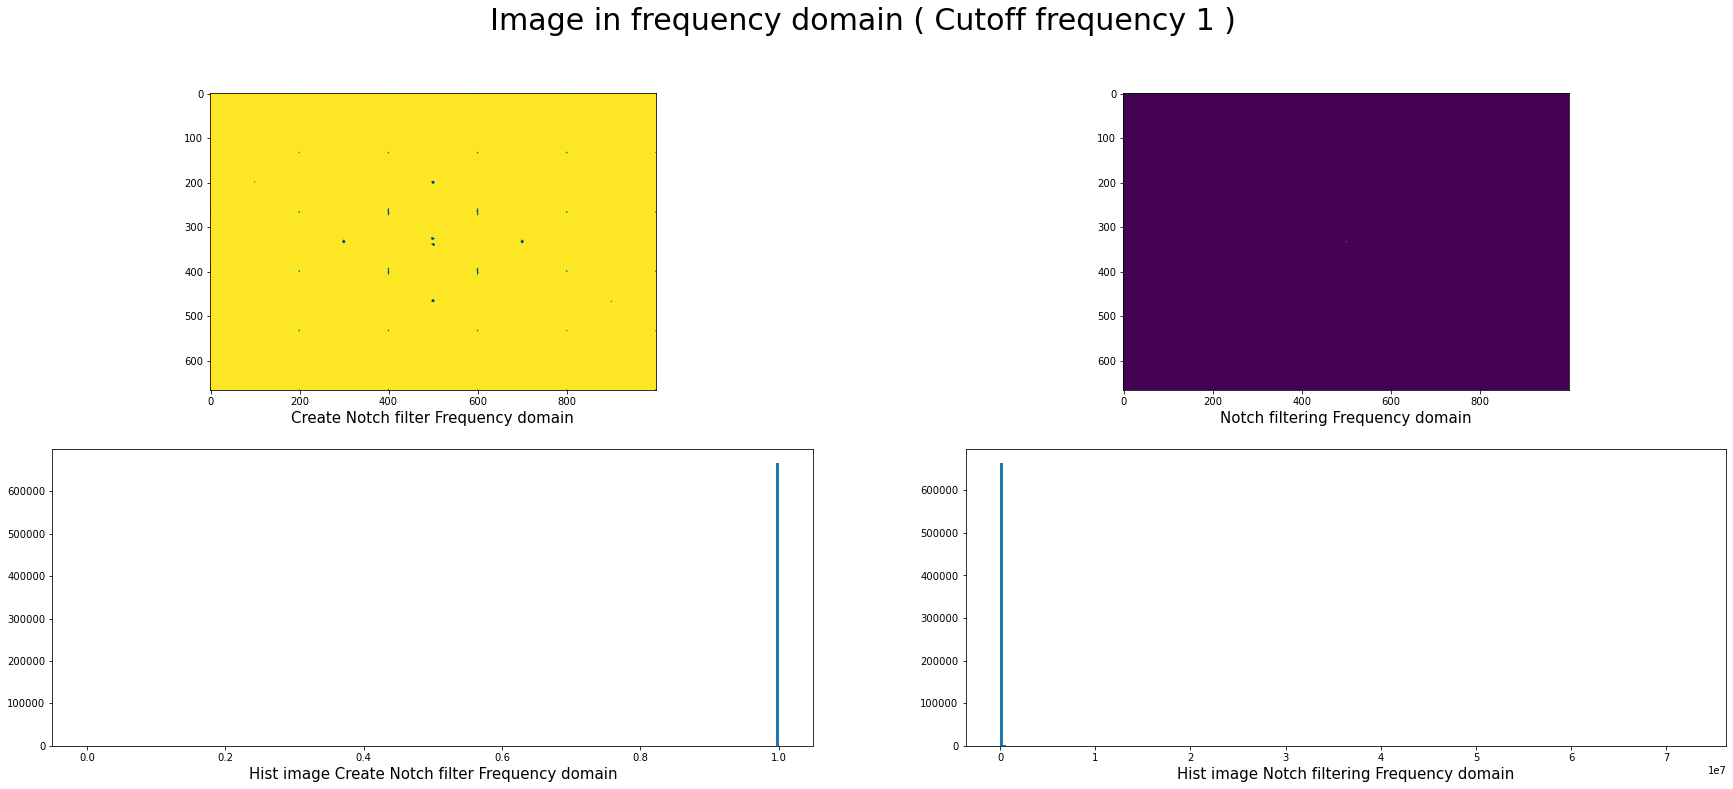

In [46]:
Notch_filter_show = [Notch_filter,out_Notch_filter_Periodic_Noise] 
ImageSubplot_freq(Notch_filter_show,img_name = ["Create Notch filter Frequency domain","Notch filtering Frequency domain"],Title = f"Image in frequency domain ( Cutoff frequency {cutoff_freq_Notch} )")

In [47]:
GRAY_IFFT_Notch_filter,_ = Invert_Fast_Fourier_Transform(out_Notch_filter_Periodic_Noise,Periodic_Noise_freq_phase)

complex128
(666, 1000)


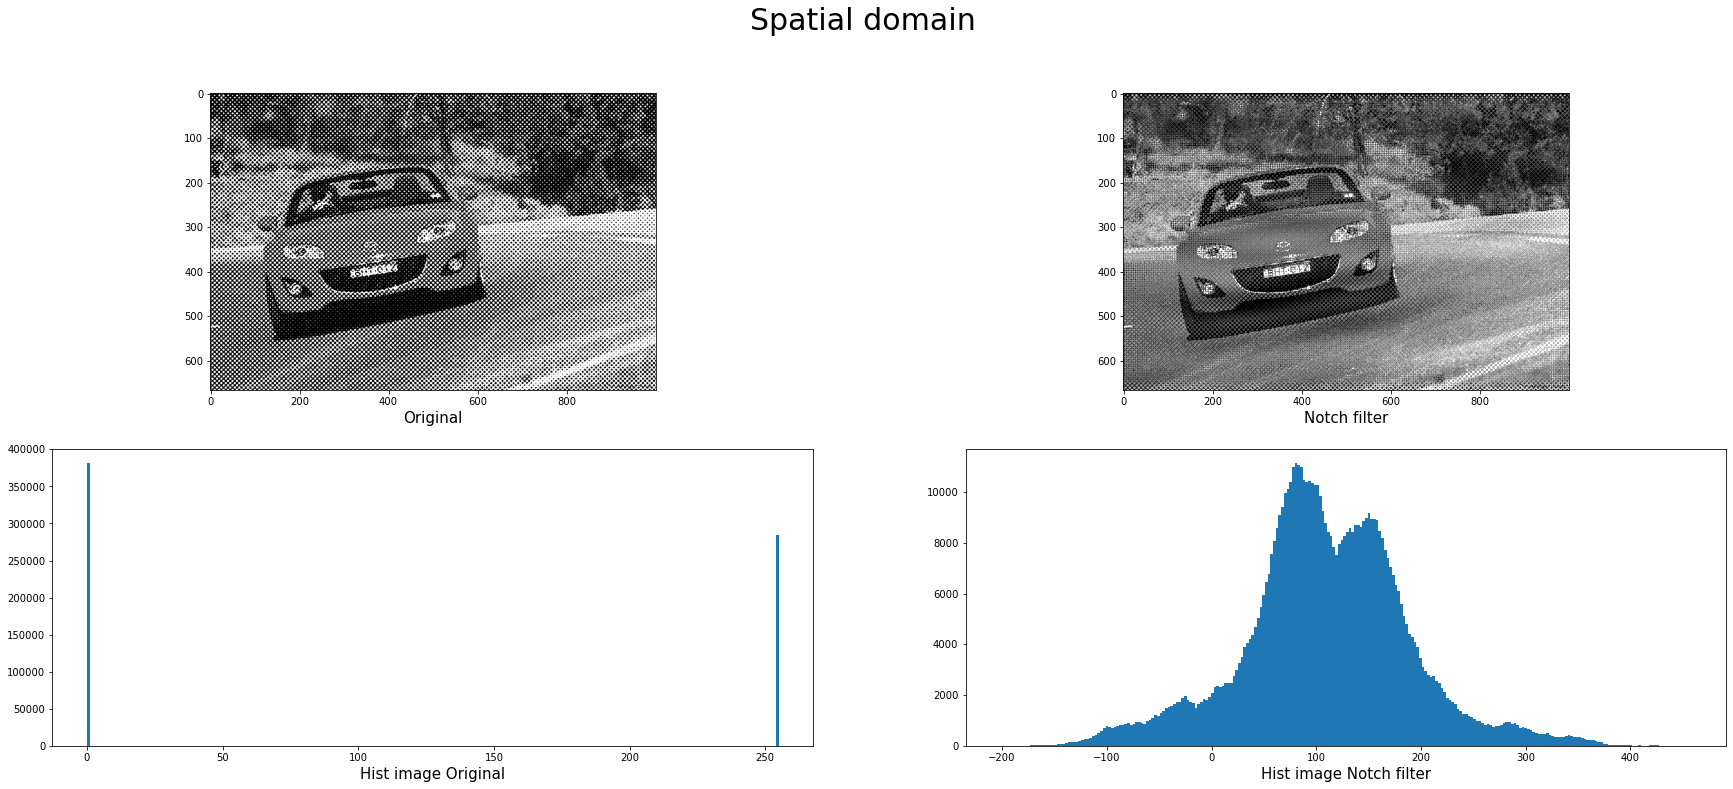

In [48]:
GRAY_IFFT_Notch_filter_compare = [Periodic_Noise,GRAY_IFFT_Notch_filter]
ImageSubplot(GRAY_IFFT_Notch_filter_compare,img_name = ["Original","Notch filter"],Title = "Spatial domain")

## 4. การทดลองที่ 4 Frequency/ Direction Selective Bandpass Filter (Extra Credit ไม่ต้องทําก็ได้)
#### เป็นการทดลองเพื่อศึกษาการวิเคราะห์แยกตัวประกอบภาพโดยใช้ตัวกรองแบบ Gaussian Bandpass Filter เพื่อให้นิสิตสามารถสร้าง Gaussian Bandpass Filter ได้ โดยทําการทดลองตามขึ้นตอนต่อไปนี้

### 4.1. ให้นิสิตนํารูปภาพมา 1 ภาพ กรณีที่เป็นภาพสี ให้ทําการแปลงเป็นรูปขาวดํา (Gray-Scale)

Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)


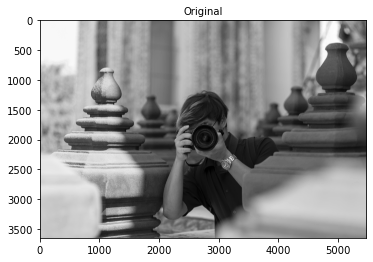

In [49]:
Gray_Img = readImagefromFile("_MG_5488.jpg")
plt.imshow(Gray_Img, cmap="gray", vmin=0, vmax=255)
plt.title("Original", fontsize=10)
plt.show()

### 4.2. ทําการแปลงรูปภาพให้อยู่ในโดเมนความถี่โดยการใช้ 2D Fourier Transform

In [50]:
_,freq_phase_4,freq_magnitude_4 = Fast_Fourier_Transform(Gray_Img)

Shape in put image is (3648, 5472)
complex128
(3648, 5472) (3648, 5472)
Shape out put is (3648, 5472)


### 4.3. สร้างตัวกรองแบบ Gaussian Bandpass Filter โดยตัวกรองต้องสามารถกําหนด Cut-off Frequency ได้ โดยให้นิสิตเป็นผู้กําหนดช่วงความถี่เอง (ต้องกําหนด 2 ค่า คือ ช่วงความถี่เริ่มต้น, ช่วงความถี่สุดท้าย ที่จะให้ Filter ปล่อยผ่าน)

### 4.4. เพิ่มการกําหนดช่วงทิศทาง ให้สามารถเลือกทิศทางได้โดยสามารถกําหนดช่วงทิศทางเริ่มต้น และทิศทางที่สิ้นสุดได้

In [51]:
def Gaussian_function(distance_map, band_center, band_width):
    ### -> Create Gaussian array
    Gauss_func = distance_map.copy()
    # Gaussian Function
    Gauss_func = np.exp(-1*pow( ( pow(Gauss_func,2) - pow(band_center,2) ) / (Gauss_func*band_width),2 ) )
    return Gauss_func

def Gaussian_Bandpass_Filter(fft_magnitude, f_pos, band_center, band_width):
    ### -> Distance Map
    distance_map = distanceMap(fft_magnitude, f_pos)
    ### -> Gaussian Band-pass Filter
    bp_Gauss_filter = Gaussian_function(distance_map, band_center, band_width)
    return bp_Gauss_filter

In [52]:
### -> Center
center_pos4 = (freq_magnitude_4.shape[1]//2,freq_magnitude_4.shape[0]//2)

c_bp_Gauss_filter =  Gaussian_Bandpass_Filter(freq_magnitude_4, center_pos4, band_center = 10, band_width = 5)

In [53]:
## Filtering
IMG_Gaussian = c_bp_Gauss_filter * freq_magnitude_4

In [54]:
IMG_Gaussian_IFFT,_ = Invert_Fast_Fourier_Transform(IMG_Gaussian,freq_phase_4) 

complex128
(3648, 5472)


### 4.5. นําภาพมาผ่านตัวกรองที่สร้างขึ้น และทํา Inverse Fourier Transform จากนั้นแสดงภาพก่อนและหลังการผ่านตัวกรองใน Spatial domain และ Frequency domain ภาพของตัวกรองที่ใช้พร้อม Parameter และ Source Codeโปรแกรม Python

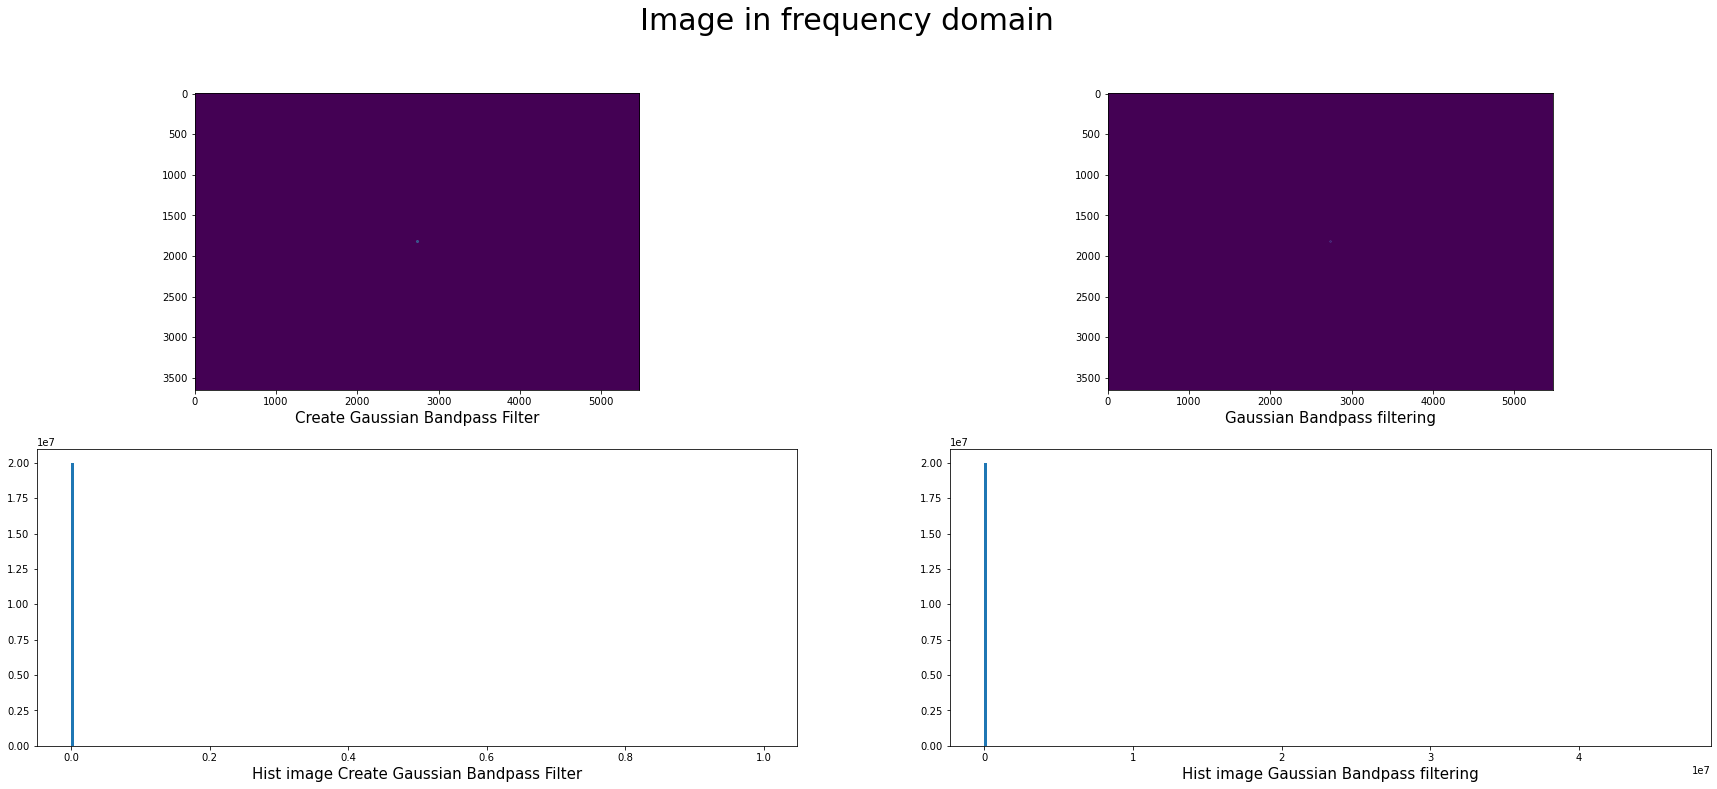

In [55]:
Gaussian_Bandpass_Filter_show = [c_bp_Gauss_filter,IMG_Gaussian] 
ImageSubplot_freq(Gaussian_Bandpass_Filter_show,img_name = ["Create Gaussian Bandpass Filter","Gaussian Bandpass filtering"],Title = f"Image in frequency domain")

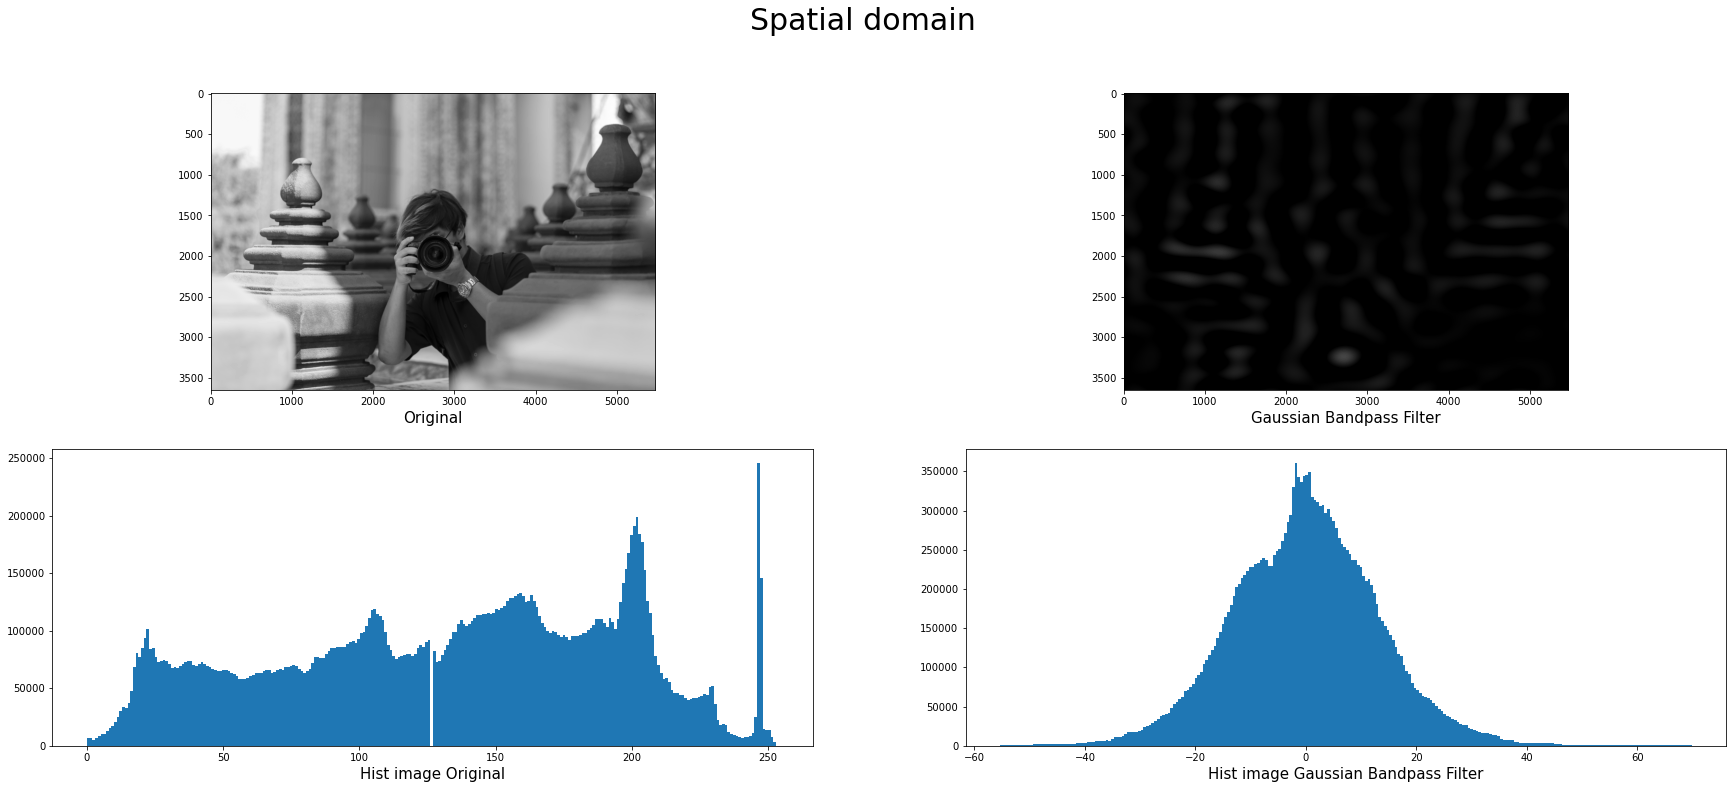

In [56]:
Gaussian_Bandpass_Filter_show_spatial = [Gray_Img,IMG_Gaussian_IFFT]
ImageSubplot(Gaussian_Bandpass_Filter_show_spatial,img_name = ["Original","Gaussian Bandpass Filter"],Title = "Spatial domain")